## EN3150 Assignment 01
#### Learning from data and related challenges and linear models for regression
T.P.I.M. Priyanjana 220495P

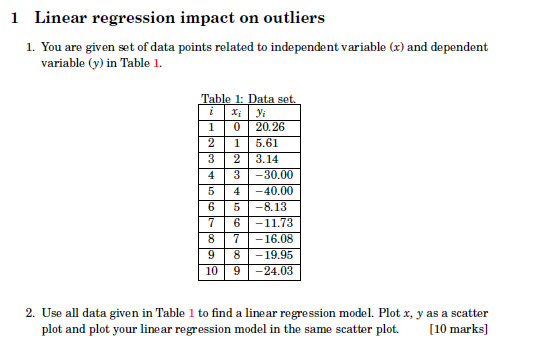


w: [-3.55727273]
b: 3.9167272727249784


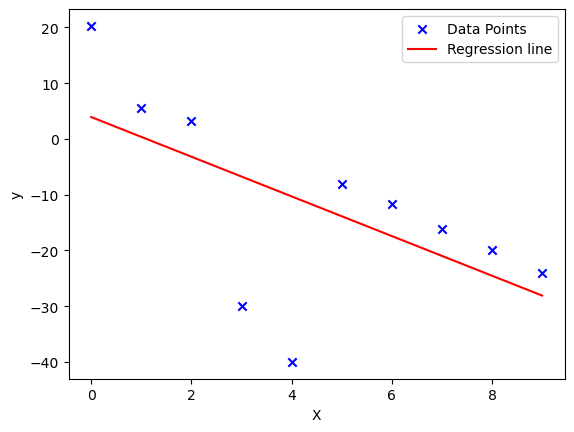

In [74]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
y = np.array([20.26,5.61,3.14,-30,-40,-8.13,-11.73,-16.08,-19.95,-24.03])

def compute_cost(x,y,w):
    m = x.shape[0]
    fw_b = np.dot(x,w) + b
    cost = (y-fw_b)**2

    return np.sum(cost)/(2*m)


def gradient_descent(x , y , iterations ,alpha):
    m = x.shape[0]
    w = np.zeros(x.shape[1])
    b = 0
    for i in range(iterations):
        dw = (1/m) * np.dot(x.T,(np.dot(x,w) + b - y))
        db = (1/m) * np.sum(np.dot(x,w) + b - y)
        w = w - alpha * dw
        b = b - alpha * db
    return w,b

w , b = gradient_descent(x,y,10000,0.01)

y_hat = np.dot(x,w) + b

print("w:", w)
print("b:", b)

plt.scatter(x, y, color="blue", label="Data Points" , marker="x")
plt.plot(x, y_hat, color="red", label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


Using scikit-learn library

w: -3.5572727272727267
b: 3.91672727272727


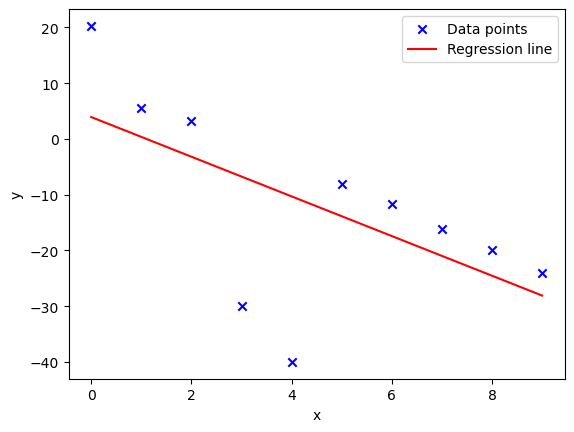

In [75]:
from sklearn.linear_model import LinearRegression

x = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
y = np.array([20.26,5.61,3.14,-30,-40,-8.13,-11.73,-16.08,-19.95,-24.03])

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

print("w:", model.coef_[0])
print("b:", model.intercept_)

plt.scatter(x, y, color="blue", label="Data points" , marker="x")
plt.plot(x, y_pred, color="red", label="Regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

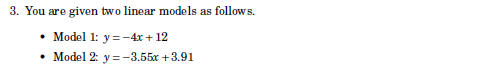
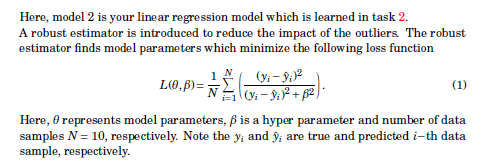
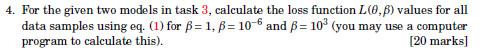

In [76]:
def lossFunction(y,y_hat,beta,N):
    return (1/N) * np.sum((y - y_hat)**2 / ((y - y_hat)**2 + beta**2)) 

# For Model 1 , y = -4x +12

# For beta = 1
y1 = -4 * x + 12
loss1_beta1 = lossFunction(y, y1, 1, x.shape[0])
print("Loss for Model 1 , beta=1:", loss1_beta1)
# For beta = 10e-6
loss1_beta2 = lossFunction(y, y1, 10e-6, x.shape[0])
print("Loss for Model 1 , beta=10e-6:", loss1_beta2)
# For beta = 10e3
loss1_beta3 = lossFunction(y, y1, 10e3, x.shape[0])
print("Loss for Model 1 , beta=10e3:", loss1_beta3)

print("\n")


# For Model 2 , y = -3.55x + 3.91

# For beta = 1
y2 = -3.55 * x + 3.91
loss2_beta1 = lossFunction(y, y2, 1, x.shape[0])
print("Loss for Model 2 , beta=1:", loss2_beta1)
# For beta = 10e-6
loss2_beta2 = lossFunction(y, y2, 10e-6, x.shape[0])
print("Loss for Model 2 , beta=10e-6:", loss2_beta2)
# For beta = 10e3
loss2_beta3 = lossFunction(y, y2, 10e3, x.shape[0])
print("Loss for Model 2 , beta=10e3:", loss2_beta3)


Loss for Model 1 , beta=1: 9.298106774224125
Loss for Model 1 , beta=10e-6: 9.999999982566756
Loss for Model 1 , beta=10e3: 4.618526444397768e-05


Loss for Model 2 , beta=1: 9.490552440311616
Loss for Model 2 , beta=10e-6: 9.999999999885631
Loss for Model 2 , beta=10e3: 3.967249116322417e-05


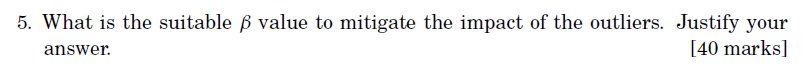
## beta = 10e3

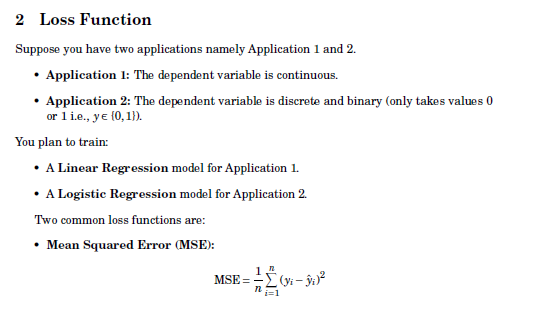
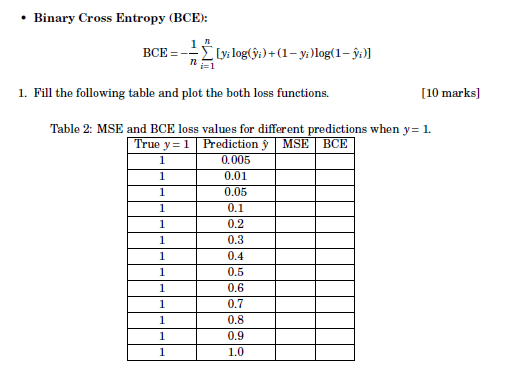

,True y,Prediction y_hat,MSE,BCE
0,1,0.005,0.990025,5.298317
1,1,0.010,0.980100,4.605170
2,1,0.050,0.902500,2.995732
3,1,0.100,0.810000,2.302585
4,1,0.200,0.640000,1.609438
5,1,0.300,0.490000,1.203973
6,1,0.400,0.360000,0.916291
7,1,0.500,0.250000,0.693147
8,1,0.600,0.160000,0.510826
9,1,0.700,0.090000,0.356675


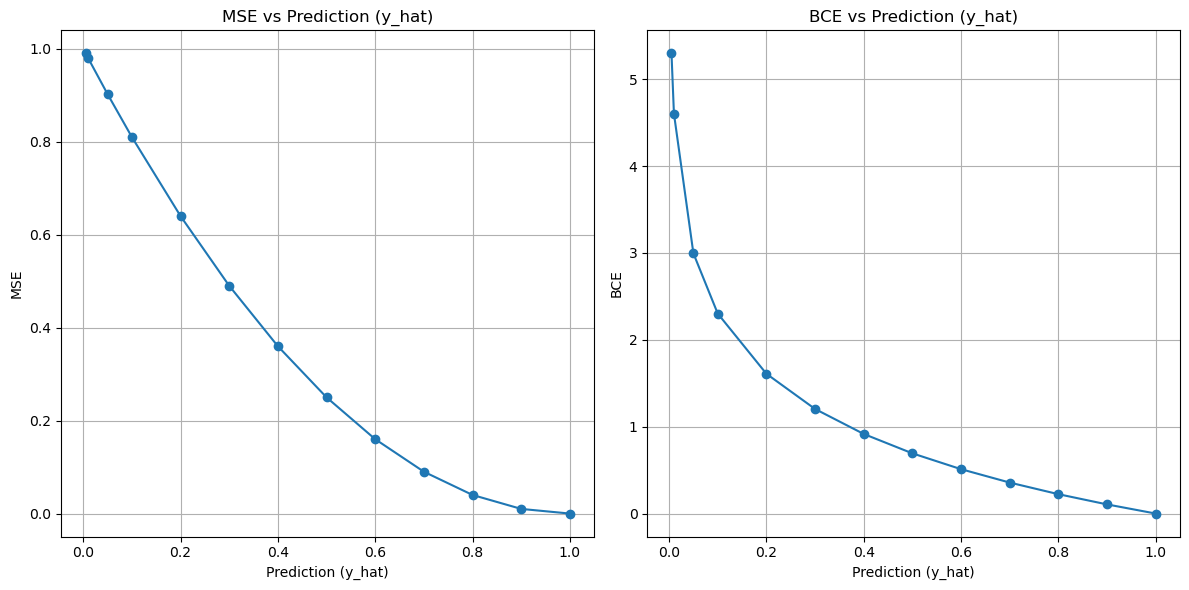

In [77]:
import pandas as pd

def MSE(y, y_hat , n):
    return np.sum((y - y_hat) ** 2) / n

def BCE(y, y_hat , n):
    if y -  y_hat == 0:
        return 0
    return -np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat )) / n

y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_hat = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

MSE_values = []
BCE_values = []

for i in range(len(y_hat)):
    MSE_values.append(MSE(y[i], y_hat[i], 1))
    BCE_values.append(BCE(y[i], y_hat[i], 1))

data = {
    'True y': y,
    'Prediction y_hat': y_hat,
    'MSE': MSE_values,
    'BCE': BCE_values
}

df = pd.DataFrame(data)


from IPython.display import display
display(df)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(y_hat, MSE_values, marker='o')
plt.title('MSE vs Prediction (y_hat)')
plt.xlabel('Prediction (y_hat)')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(y_hat, BCE_values, marker='o')
plt.title('BCE vs Prediction (y_hat)')
plt.xlabel('Prediction (y_hat)')
plt.ylabel('BCE')
plt.grid(True)

plt.tight_layout()
plt.show()

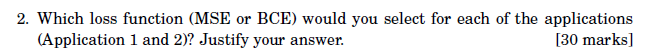



# Selecting Loss Functions for Different Applications

## Comparison of MSE and BCE

Based on the plots and data table above, we can observe how MSE (Mean Squared Error) and BCE (Binary Cross-Entropy) behave differently with varying prediction values when the true value is 1:

1. **MSE (Mean Squared Error)**:
   - Increases quadratically as predictions deviate from the true value
   - Equal penalization for over-predictions and under-predictions of the same magnitude
   - Values range from 0 (perfect prediction) to 1 (completely wrong prediction)
   - More sensitive to outliers due to squaring of errors

2. **BCE (Binary Cross-Entropy)**:
   - Increases exponentially as predictions approach 0 (for true value = 1)
   - Asymmetric penalization: heavily penalizes confident but wrong predictions
   - Approaches infinity as prediction approaches 0 (for true label 1)
   - Values 0 only when prediction exactly matches true value

## Application Selection

### Application 1: Regression for Continuous Values (e.g., House Price Prediction)

**Recommended Loss Function: MSE**

**Justification:**
- MSE is well-suited for regression tasks where the target is a continuous value
- The quadratic nature of MSE provides a balanced penalization for errors in either direction
- MSE has nice mathematical properties like differentiability, making optimization straightforward
- The gradual increase in penalty helps models converge smoothly for regression tasks
- For applications like predicting house prices, temperature, or any continuous quantity, MSE provides appropriate gradients for learning

### Application 2: Binary Classification (e.g., Spam Detection, Disease Diagnosis)

**Recommended Loss Function: BCE**

**Justification:**
- BCE is specifically designed for binary classification problems (0 or 1 outcomes)
- It provides appropriate gradients when predictions should be probabilities between 0 and 1
- The logarithmic nature of BCE heavily penalizes confident but wrong predictions
- BCE encourages outputs to be valid probabilities, which is essential for classification tasks
- For applications like spam detection or disease diagnosis, where false negatives/positives have different implications, BCE's asymmetric treatment of errors is beneficial

## Conclusion

The choice between MSE and BCE should be guided by:
1. The nature of the target variable (continuous vs. binary)
2. The desired interpretation of the model's output (exact value vs. probability)
3. The sensitivity needed for errors in different directions

The plots above clearly demonstrate how these loss functions behave differently as predictions move away from true values, providing insight into their appropriate applications.

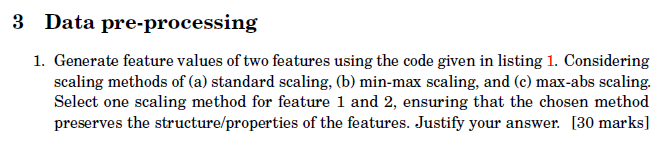

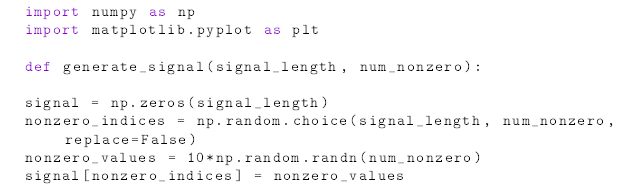
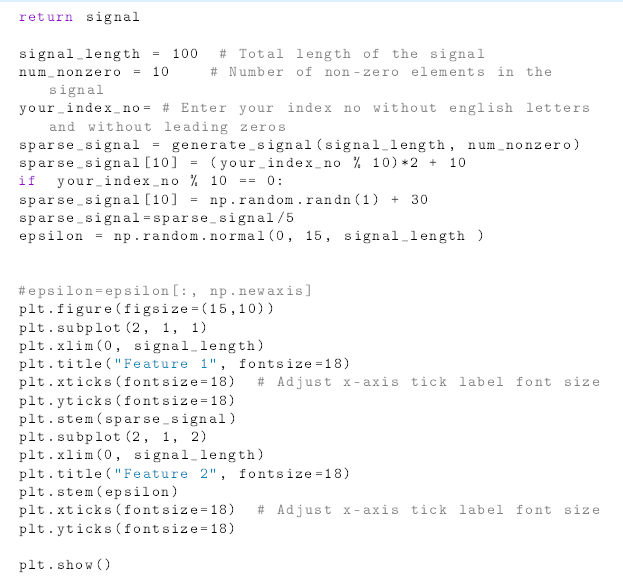

In [66]:
def generate_signal ( signal_length , num_nonzero ):
    signal = np. zeros ( signal_length )
    nonzero_indices = np. random . choice ( signal_length , num_nonzero ,
    replace = False )
    nonzero_values = 10* np. random . randn ( num_nonzero )
    signal [ nonzero_indices ] = nonzero_values
    return signal

signal_length = 100 # Total length of the signal
num_nonzero = 10 # Number of non - zero elements in the signal
your_index_no = 220495 # Enter your index no without english letters and without leading zeros
sparse_signal = generate_signal ( signal_length , num_nonzero )
sparse_signal [10] = ( your_index_no % 10) *2 + 10

if your_index_no % 10 == 0:
    sparse_signal [10] = np. random . randn (1) + 30
    sparse_signal = sparse_signal /5

epsilon = np. random . normal (0, 15, signal_length )


3.88682228871528
13.71559445970785
13.71559445970785


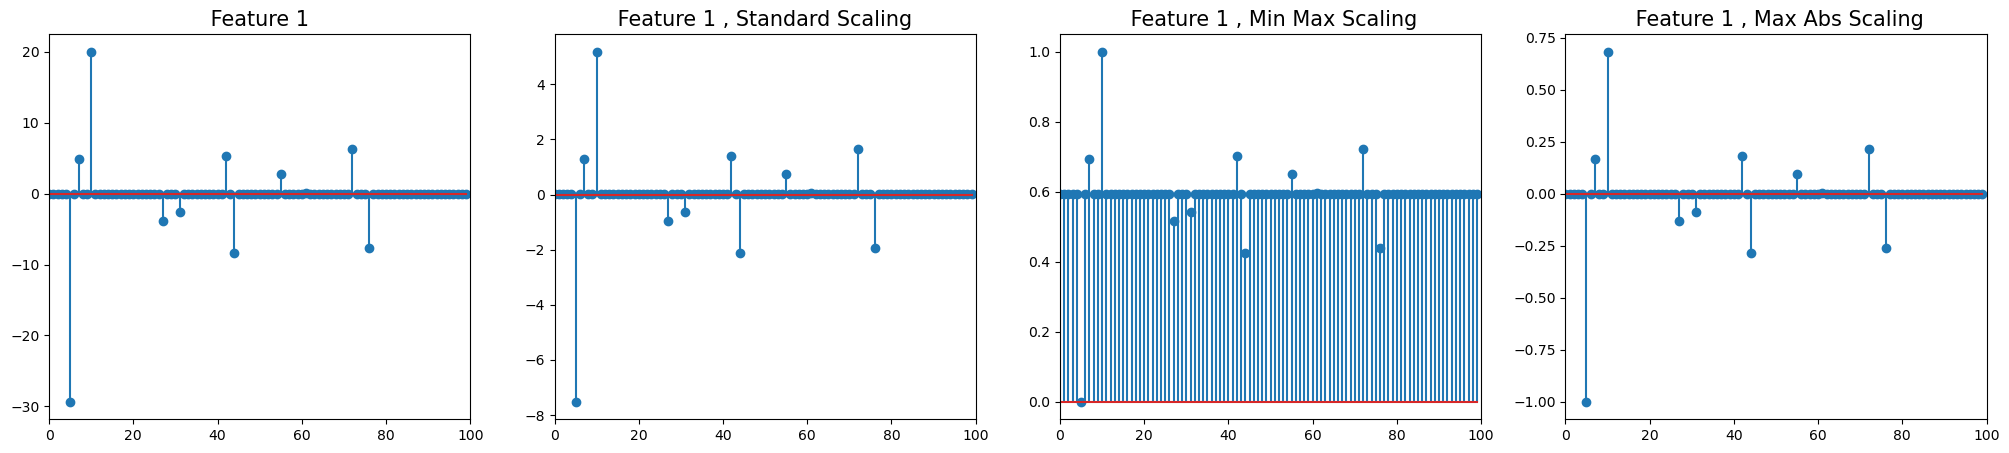

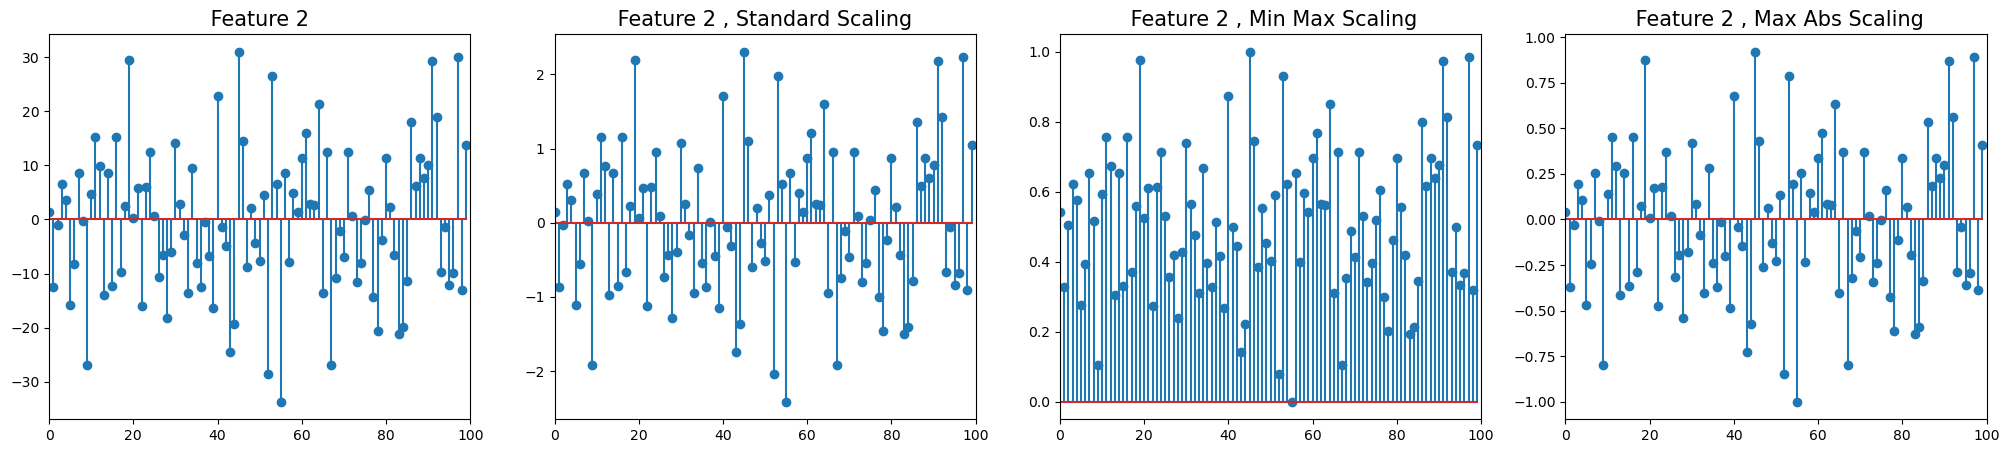

In [ ]:
def standard_scaling(data):
    mean = np.mean(data)
    std = np.std(data)
    if std == 0:
        return data - mean
    return (data - mean) / std

def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    if max_val == min_val:
        return data - min_val
    return (data - min_val) / (max_val - min_val)

def max_abs_scaling(data):
    max_abs_val = np.max(np.abs(data))
    if max_abs_val == 0:
        return data
    return data / max_abs_val

plt . figure ( figsize =(25 ,5) )
plt . subplot (1, 4, 1)
plt . xlim (0, signal_length )
plt . title (" Feature 1 ", fontsize =15)
plt . stem (sparse_signal)

plt . subplot (1, 4, 2)
plt . xlim (0, signal_length )
plt . title (" Feature 1 , Standard Scaling ", fontsize =15)
plt . stem (standard_scaling(sparse_signal) )

plt . subplot (1, 4, 3)
plt . xlim (0, signal_length )
plt . title (" Feature 1 , Min Max Scaling", fontsize =15)
plt . stem (min_max_scaling(sparse_signal) )

plt . subplot (1, 4, 4)
plt . xlim (0, signal_length )
plt . title (" Feature 1 , Max Abs Scaling", fontsize =15)
plt . stem (max_abs_scaling(sparse_signal) )



plt . figure ( figsize =(25 ,5) )
plt . subplot (1, 4, 1)
plt . xlim (0, signal_length )
plt . title (" Feature 2 ", fontsize =15)
plt . stem (epsilon)

plt . subplot (1, 4, 2)
plt . xlim (0, signal_length )
plt . title (" Feature 2 , Standard Scaling ", fontsize =15)
plt . stem (standard_scaling(epsilon) )

plt . subplot (1, 4, 3)
plt . xlim (0, signal_length )
plt . title (" Feature 2 , Min Max Scaling", fontsize =15)
plt . stem (min_max_scaling(epsilon) )

plt . subplot (1, 4, 4)
plt . xlim (0, signal_length )
plt . title (" Feature 2 , Max Abs Scaling", fontsize =15)
plt . stem (max_abs_scaling(epsilon) )

plt . show ()


### Choosing Scaling Methods for Features

#### Feature 1 (Sparse Signal)

Mostly zeros, some large values.

1. If we use Standard Scaling, zeros will no longer stay zero. ❌

2. If we use Min–Max Scaling, extreme values can squash the smaller ones. ⚠️

3. Best choice: Max-Abs Scaling ✅

Keeps zeros as zeros.

Preserves sparsity structure.

Normalizes large values to [-1,1].

#### Feature 2 (Gaussian Noise epsilon)

Dense, normally distributed.

Best scaling: Standard Scaling ✅

Makes it zero mean, unit variance.

Works well for Gaussian-like noise.

Preserves distributional shape.

#### Justification 

For Feature 1 (sparse signal), I would use Max-Abs scaling, because it preserves sparsity (zeros remain zero) and normalizes the signal without being too sensitive to outliers.

For Feature 2 (noise), I would use Standard Scaling, because the data is Gaussian-like, and standardization preserves its distribution while centering it to mean 0 and variance 1.

Thus, the structure of both features is preserved.